In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("./dataset_5secondWindow/dataset_5secondWindow.csv")
d_f = df.dropna(axis=1, how="any", thresh=len(df)*.5, subset=None, inplace=False)
not_null = [col for col in df.columns if df[col].isnull().sum() < 1]
new_null = [i for i in df.columns if 1<= df[i].isnull().sum()<2374]

df1 = d_f[new_null].rolling(window=10, min_periods=1).mean()

df2= df[not_null]
df3= pd.concat([df2,df1], axis = 1)
df3 =df3.dropna(axis=0, how="any")

<AxesSubplot:>

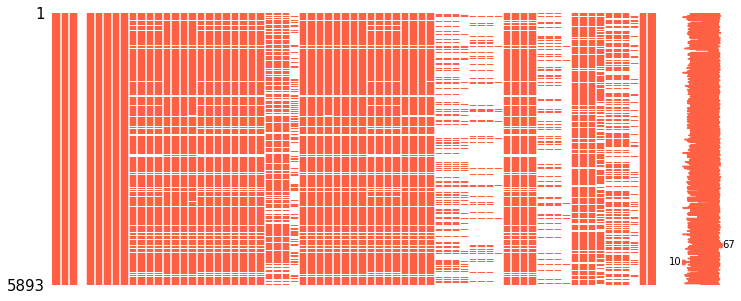

In [39]:
#missing value on the raw data
msno.matrix(df,figsize=(12,5), fontsize=12, color=(1, 0.38, 0.27))

<AxesSubplot:>

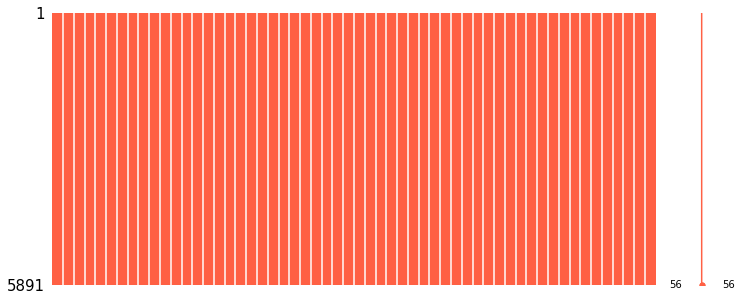

In [40]:
#checking the missing value after it has been replaced with mean of the particular sensor 
#this was used as the final data set for training the model
msno.matrix(df3,figsize=(12,5), fontsize=12,color=(1, 0.38, 0.27))

<AxesSubplot:>

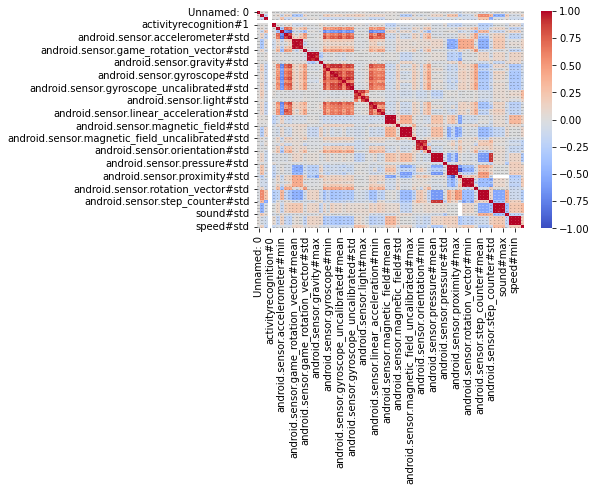

In [41]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', annot_kws={'size':0})

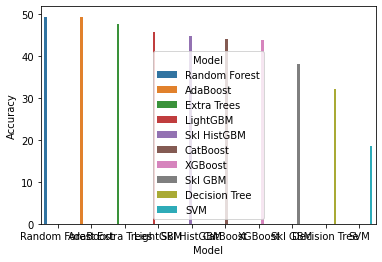

In [23]:
#accuracy graph of the benchmark data after deleting column with 50 percent null_values and replacing the remaining null values with the mean 

benchmark= pd.read_csv('benmarch_model.csv')
feature= pd.read_csv('feature_engineer_model.csv')

ax = sns.barplot(x="Model",y="Accuracy",hue="Model", data=benchmark)
# f, ax = plt.subplots(figsize=(15, 15))
# sns.catplot(x="Model",y= "Accuracy", hue="Model",kind="bar" , data=benchmark)
# sns.catplot(x="Model",y= "Accuracy", hue="Model",kind="bar" , data=feature)



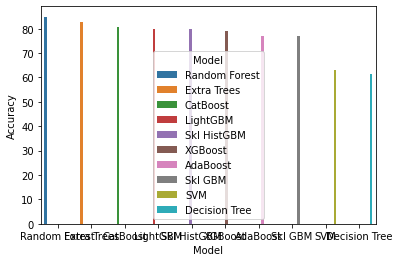

In [28]:
#accuracy graph of the feature enginered data after deleting column with 50 percent null_values and replacing the remaining null values with the mean 
ax = sns.barplot(x="Model",y="Accuracy",hue="Model", data=feature)

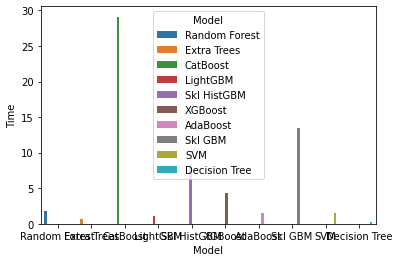

In [29]:
# time of completion of each model per seconds
ax = sns.barplot(x="Model",y="Time",hue="Model", data=feature)

In [ ]:
# did grid search on 6 model with execution time below 2 seconds and fix the hyperrameter to run the 6 model again 



